<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

#### <center> Kiara Avendano ( s10219186A )
##### <center> Assignment 1

# Table of Contents <a id="top"></a>

## 1 [Introduction](#1)
   - [1.1 Focus](#1.1)


## 2 [Exploration](#2)
   - [2.1 Overview of Dataset](#2.1)
   - [2.2 Missing Values](#2.2)
   - [2.2 Attributes of Outlets](#2.3)
   - [2.2 Attributes of Items](#2.4)


## 3 [Cleaning ](#3)
   - [3.1 Pre-processing](#3.1)
   - [3.2 Missing Data](#3.2)


## 4 [Data Transformation](#4)
   - [4.1 Numerical](#4.1)
   - [4.2 Encoding Categorical](#4.2)
   - [4.3 Discretization](#4.3)


## 5 [Feature Engineering](#5)
   - [5.1 Creation / Dropping](#5.1)
   - [5.2 Scaling](#5.2)


## 6 [Linear Regression Model](#6)
   - [6.1 Build](#6.1)
   - [6.2 Evaluate](#6.2)

## 7 [Summary](#end)
   - [7.1 Further improvements](#7.1)

[Back to top](#top)

In [1]:
# import the necessary packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Introduction <a id="1"></a>

### Focus <a id="1.1"></a>

This report will focus on exploring, preparing and transforming the given dataset "supermarket.csv", so as to build and evaluate a linear regression model trained with the processed dataset. Throughout this report, comparisons of the chosen evaluation metric will be made between different data wrangling techniques. Such techniques may be supported by either the evaluation metric or the anaylsis of the original dataset. These comparisons and findings will also be documented in each section.

The [end goal](#end) of the linear regression model is to predict the sales of a product at each outlet accurately, using the cleaned dataset. The evaluation metric used throughout the report when comparing techniques will be the r-square (r-sq) value of the test dataset. This is because the model is made to forecast future sales, thus the percentage of variation explained in the target variable or the "unknown values" using the explanatory variables is most important.

[Back to top](#top)

## Exploration <a id="2"></a>

### Overview of Dataset <a id="2.1"></a>

Before starting with wrangling the dataset, its independent variables need to be investigated to understand their meaning and to plan out the proper techniques to use later on. Below presents a quick overview of the original dataset:

In [2]:
df = pd.read_csv("./supermarket.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Most of what is seen have already been explained in the assignment brief, which is shown below. 

 <a id = "col"></a> 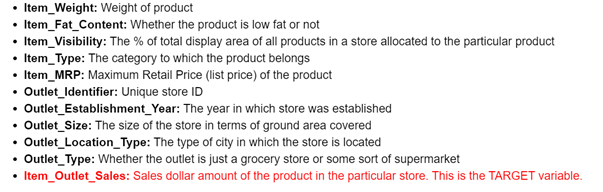

From these, some assumptions were made solely based on the column descriptions and a quick look at the first five rows. They are:
- Item weight would have a positive relationship with item visibility
-	Location type would impact outlet size
-	Outlet type would have impact on size
-	Item fat content may not have much effect on sales
-	Fat content can be used to find food products
-	Item type would have relationship to visibility
-	Outlet establishment year would have more sales in count
-	Outlet sales would have strong relation to Item Maximum Retail Price (MRP)

In addition to this, there seems to be some NaN present, specifically in the column "Outlet_Size". Since such null values are detrimental to the linear regression model, this issue will be investigated further first.

### Missing Values <a id="2.2"></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In the dataset, two columns contain missing values, which are "Item_Weight" and "Outlet_Size".

In [4]:
df[df["Item_Weight"].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [5]:
# choosing one randomly
df[df["Item_Identifier"] == "FDC37"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
4652,FDC37,15.5,Low Fat,0.032846,Baking Goods,106.7938,OUT013,1987,High,Tier 3,Supermarket Type1,3215.8140
6212,FDC37,15.5,Low Fat,0.032924,Baking Goods,107.2938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2143.8760


<a id = "iw"></a>Interestingly, the rows with "Item_Weight" missing seems to be a human error, which possibly occurred during data input. This is because the missing values can actually be found throughout the original dataset, by searching the missing values' "Item_Identifier". Thus, the missing values can be imputated by the other values of "Item_Weight" for the same "Item_Identifier", since each item should have the same weight througout all the records. 

In [6]:
df[df["Outlet_Size"].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


From this, it seems that the missing values are consistent with the "Outlet_Identifier", so the NaN values cannot be replaced with pre-existing data. With this in mind, the default course of action it to imputate the values with a missing indicator.

### Attributes of Outlet <a id="2.3"></a>

To understand the outlets present in the dataset, a dataframe should be created which aggregrates all the relevant attributes.

In [7]:
outlet_cols = [x for x in df.columns if "Outlet" in x]

outlet = df.groupby("Outlet_Identifier")[outlet_cols[1:-1]].agg(pd.Series.mode)
outlet.reset_index()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT010,1998,[],Tier 3,Grocery Store
1,OUT013,1987,High,Tier 3,Supermarket Type1
2,OUT017,2007,[],Tier 2,Supermarket Type1
3,OUT018,2009,Medium,Tier 3,Supermarket Type2
4,OUT019,1985,Small,Tier 1,Grocery Store
5,OUT027,1985,Medium,Tier 3,Supermarket Type3
6,OUT035,2004,Small,Tier 2,Supermarket Type1
7,OUT045,2002,[],Tier 2,Supermarket Type1
8,OUT046,1997,Small,Tier 1,Supermarket Type1
9,OUT049,1999,Medium,Tier 1,Supermarket Type1


According to the assignment brief, this dataset "have been collected at various supermarket outlets and stores in different cities". From this it is expected for the supermarket outlets to be of a varying profile with varying sizes and types. However, the outlets' size and type should be related and make sense. 

<a id = "outlet"></a>From the above dataframe, it can be seen that the dataset have 10 unique outlets with 2 grocery stores, 6 type 1 supermarkets, 1 type 2 supermarket and 1 type 3 supermarket. This "Outlet_type" seems to be pretty self-explanatory with no deep meaning, and also seems to have an ordinal meaning. In essence in terms of status the "Outlet_Type" can be ordered as such: <br> Type 3 > Type 2 > Type 1 > Grocery Store

Looking at the composition of each "Outlet_Location_Type"'s "Outlet_Type", it can be derived that "Outlet_Location_Type" refers to how developed the location of the outlet is, where Tier 1 can be thought as ghetto areas and Tier 3 being thought of as metropolitan city areas. This is supported by how Tier 3 has the most diverse combinations of "Outlet_Type" and "Outlet_Size" (similar to the downtown area having a mix of convenience stores, wet markets and hypermarts) and how Tier 1 only having small outlets or grocery stores (similar to the slums only having small stores). Additionally, there may be a correlation between this and the "Outlet_Size", where grocery stores tend to be small.

<a id = "osize"></a>According to the above insights, imputating the missing "Outlet_Size" with "Small" is an irrefutably logical approach, as grocery stores tend to be small and that type 2 supermarkets in Tier 2 locations also tend to be small.

### Attributes of Item <a id="2.4"></a>

To understand the products sold in the supermarket, the following visualisations and code blocks were done.

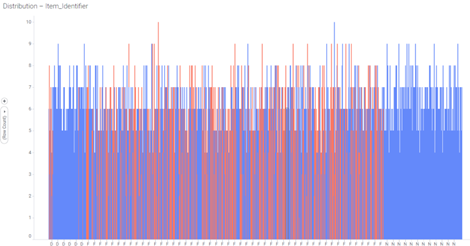

The above visualisation shows the count of each unique item present in the dataset, coloured by the items' fat content, where blue is low fat and red is regular. From here, it is noted how all the "Item_Identifiers" starting with "M" is low fat, however such a trend is not exclusive as items with "Item_Identifiers" starting with "F" can be either low fat or regular. At this point, it can be derived that the identifiers' values themselves hold no real meaning in each letter as of now, and thus is utterly useless except for identifying each item.

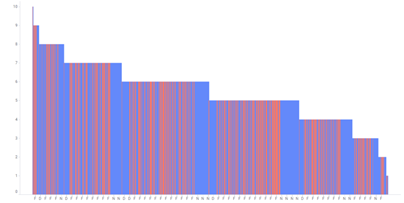

The visualisation is then sorted, which is shown above. Here this is no obvious trend in whether the items sold at more outlets tend to be either low fat or regular. The most notable insights from this is that only 2 items were sold at all 10 outlets and 4 were sold at only 1.

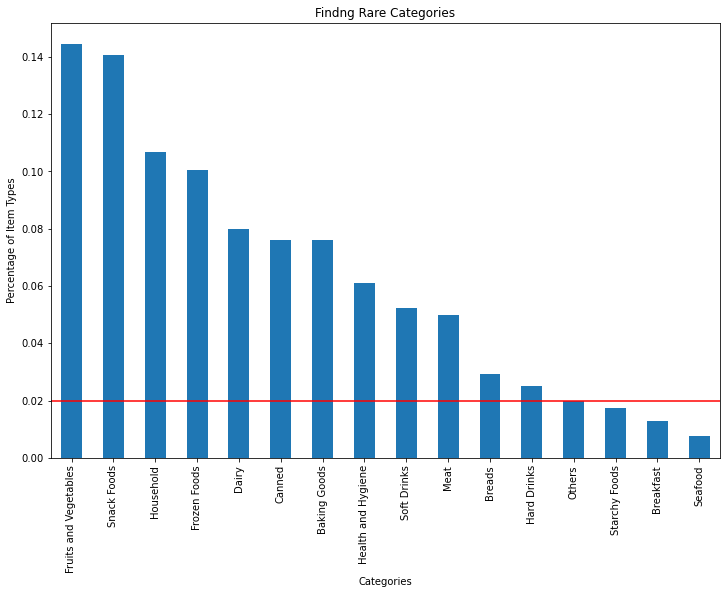

In [8]:
rare_freq = df["Item_Type"].value_counts() / len(df)

ax = rare_freq.sort_values(ascending = False).plot.bar(figsize = (12,8))

ax.axhline(y = 0.02, color = 'r')

ax.set_title('Findng Rare Categories')
ax.set_ylabel("Percentage of Item Types")
ax.set_xlabel("Categories")
plt.show()

The above visualisation has depicted there being 16 unique categories in "Item_Types", with 4 of them appearing less than >2% of the dataset. However, since these rare categories are awfully unique in terms of being unable to be regrouped sensibly, the column "Item_Types" should be left untouched for now.

In [9]:
for col in df.columns:
    print("{0} : {1}".format(col,df[col].nunique()))

Item_Identifier : 1559
Item_Weight : 415
Item_Fat_Content : 5
Item_Visibility : 7880
Item_Type : 16
Item_MRP : 5938
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


The above really stood out, as the binary variable of "Item_Fat_Content" had 5 unique values. According to the [column description](#col) mentioned, it should only contain two values : Low Fat and Regular.

In [10]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<a id = "lfclean"></a> On an unrelated note, most of the items are food items apparently, for it to have a fat composition. The above has shown how all the values do indeed either mean Low Fat or Regular, just labelled in a different way. This would require cleaning later where the uncommon values are replaced suitably.

 <a id= "lowfat"></a> In addition, it seems that majority of the items are Low Fat, to the point that regular could be considered as a minority. It is possible that that the supermarket caters to people who adopted the healthy living lifestyle, which would mean that Low Fat items would be considered as the base and norm in this context. This is can be seen in the following visualisation, after the dataset has been lightly cleaned.

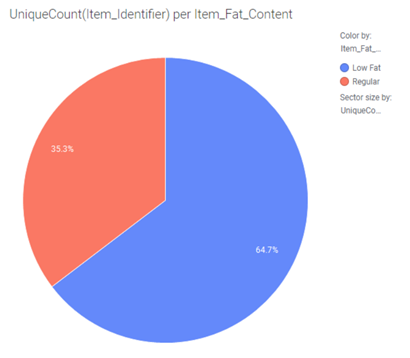

When aggregated by each item, 64.7% of the items were low fat while 35.3% were regular. This further reinforces the idea of low fat items being a norm in this supermarket context.

[Back to top](#top)

## Cleaning <a id="3"></a>

The following are user-defined functions to perform cleaning and pre-processing tasks.

In [11]:
def snakecase(df):
    df.columns = [x.lower() for x in df.columns]
    print(df.columns)

def clean_fat(df):
    lf = df["item_fat_content"].str.contains("^[lL]", regex = True)
    df.loc[lf,"item_fat_content"] = "Low Fat"
    reg = df["item_fat_content"].str.contains("^[rR]", regex = True)
    df.loc[reg,"item_fat_content"] = "Regular"
    print(df["item_fat_content"].unique())

### Pre-processing <a id="3.1"></a>

In [12]:
# in order to facilitate easier coding
# this also follows convention 
snakecase(df)

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')


[As stated above](#lfclean), the feature "item_fat_content" needs to be processed so as to replace the uncommon values for a truly binary feature.

In [13]:
# cleaning fat column
clean_fat(df)
# prints out the unique values

['Low Fat' 'Regular']


### Missing Values <a id="3.2"></a>

[As mentioned above](#osize), the missing values for "outlet_size" can be replaced as such.

In [14]:
df["outlet_size"] = df["outlet_size"].fillna("Small")
df.outlet_size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

For the missing values in "item_weight", a dataframe aggregating the max value of "item_weight" will be created as a reference for missing values imputation. Using this dataframe is in line with the  [analysis done above](#iw).

In [15]:
# create a temp df for the max of item weight of each item identifier
item_wgt_df = df.groupby("item_identifier")["item_weight"].max().reset_index()

item_wgt_df

,item_identifier,item_weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [16]:
for i in item_wgt_df.values:
    i_id = i[0]
    i_w = i[1]
    df.loc[df["item_identifier"] == i_id,"item_weight"] = i_w
# goes through each unique item id and replaces all of their item weights 
# with the max value from the item_wgt_df

print(item_wgt_df.isnull().mean())

item_identifier    0.000000
item_weight        0.002566
dtype: float64


The printed output has shown that there are still items with missing "item_weight". These items are definitely rare with only 1 record of their "item_id".

In [17]:
df[df.item_weight.isnull()]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


The below table illustrates the different values used to imputate the remaining missing values in the feature "item_weight". The table values refers to the end model's r-sq value for the test dataset, where the model takes in the cleaned dataset with optimized transformations and engineered features.

<table>
  <caption> Imputated Values' Test R-square Results </caption>
  <tr>
    <th>0</th>
    <th>Mean</th>
    <th>Median</th>
  </tr>
  <tr>
    <td>0.5684000460922365</td>
    <td>0.5684000460922365</td>
    <td>0.5684000460922365</td>
  </tr>
</table>

Surprisingly, the imputated value does not impact the end model's performance, and thus any value can be imputated into the column. For now, the mean valule will be imputated.

In [18]:
df.item_weight.fillna(df.item_weight.mean(), inplace = True)
df[df.item_weight.isnull()]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales


[Back to top](#top)

## Data Transformation <a id="4"></a>

The below are functions created for encoding and discretizing the variable.

In [19]:
def encode(train, test, variable, mapping):
    ''' a function to help map and encode when using pandas '''
    train[variable] = train[variable].map(mapping)
    test[variable] = test[variable].map(mapping)
    return train,test

def encodemap(train,test,mappingls):
    for i in mappingls:
        feature_name = i[0] # name of feature
        mapping = i[1] # dictornary
        train , test = encode(train,test,feature_name,mapping)
    return train , test

In [20]:
def meanTV(X_train,X_test, y_train):
    from feature_engine.encoding import MeanEncoder
    mean_enc = MeanEncoder(variables=None)
    mean_enc.fit(X_train, y_train)
    xtra = mean_enc.transform(X_train)
    xtes = mean_enc.transform(X_test)
    
    return xtra , xtes


In [21]:
def tts(df,target):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1), df[target], test_size=0.3, random_state = 1)
    return X_train, X_test, y_train, y_test

At this point the dataset needs to be split up into a training dataset and a testing dataset before further transformations, which is as such.

In [22]:
xtra , xtes , ytra , ytes = tts(df,"item_outlet_sales")

### Numerical <a id="4.1"></a>

The next block is a function to visualize all the numerical values for univariate analysis.

In [23]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
    import scipy.stats as stats
    # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()


To decide which features to "operate" on using the numerical transfromation methods, all the numerical features in the dataset have been visualised below.

C:\Users\Kayen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


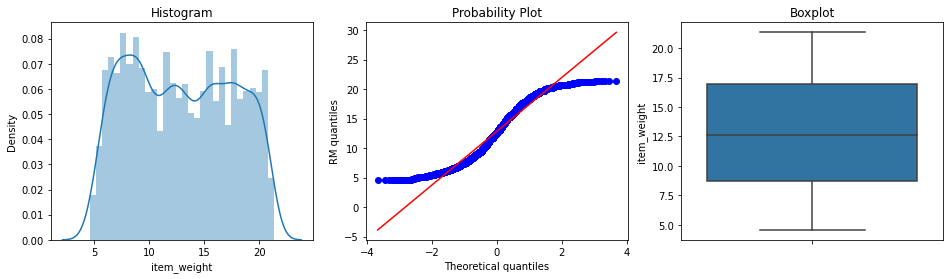

C:\Users\Kayen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


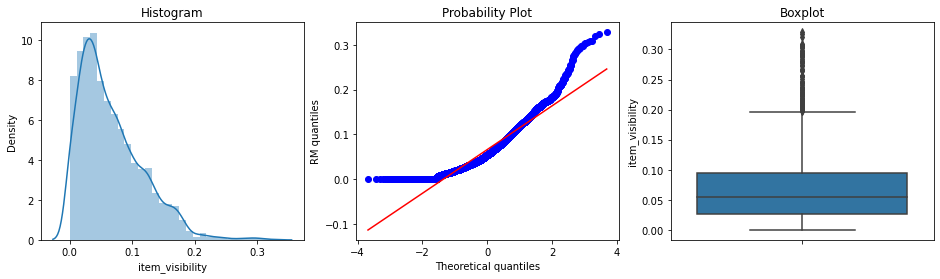

C:\Users\Kayen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


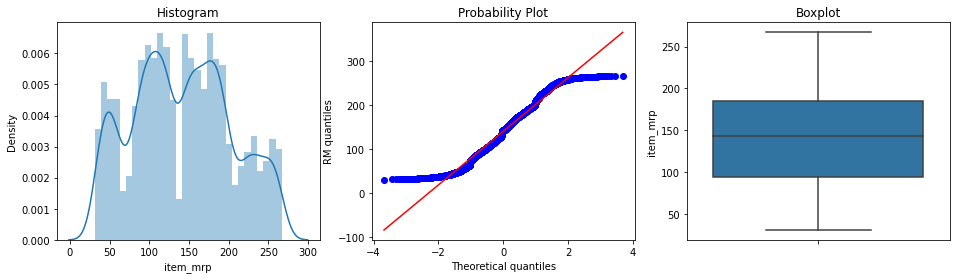

C:\Users\Kayen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


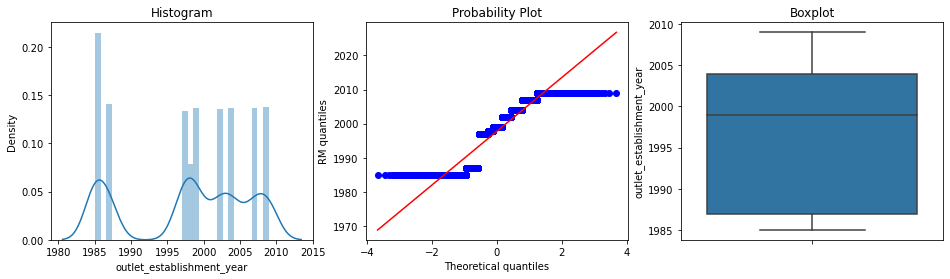

In [24]:
num_cols = [c for c in xtra.columns if xtra[c].dtypes!='O']

for i in num_cols: 
    diagnostic_plots(xtra,i)

In reference of the above visualisations,  only 3 features seems suitable to be transformed using mathematical transformations, which are: "item_weight", "item_visibility" and "item_mrp". The feature "outlet_establishment_year" seems to be a discrete numerical variable with no anomalous data points, thus it does not seem sensible to transform the feature.

The below table illustrates the different techniques used to each of the feature mentioned above. The table values refers to the end model's r-sq value for the test dataset, where the model takes in the cleaned dataset with optimized discretization and engineered features.

As a point of reference, the end model's r-sq without any numerical data transformations is
<mark style="background-color:#FFFFBF" > 0.5684000460922365 </mark>

<table>
  <col>
  <colgroup span="1"></colgroup>
  <colgroup span="1"></colgroup>
  <tr>
    <td rowspan="1"></td>
    <th colspan="3" scope="colgroup">Features</th>
  </tr>
  <tr>
    <th>Method</th>
    <th scope="col">Visibility</th>
    <th scope="col">Weight</th>
    <th scope="col">MRP</th>
  </tr>
  <tr>
    <th scope="row">YeoJohnson</th>
    <td>0.5684000460922365</td>
    <td>0.5684000460922365</td>
    <td>0.5594077681364817</td>
  </tr>
  <tr>
    <th scope="row">Reciprocal</th>
    <td> - </td>
    <td>0.5684000460922365</td>
    <td>0.5658314709024108</td>
  </tr>
  <tr>
    <th scope="row">^ 2</th>
    <td>0.5684000460922365</td>
    <td>0.5684000460922365</td>
    <td>0.5658001684688789</td>
  </tr>
  <tr>
    <th scope="row">Square Root</th>
    <td>0.5684000460922365</td>
    <td>0.5684000460922365</td>
    <td>0.5658001684688789</td>
  </tr>
  <tr>
    <th scope="row">Log 2</th>
    <td> - </td>
    <td>0.5684000460922365</td>
    <td>0.5658001684688789</td>
  </tr>
</table>

Interestingly, due to the optimization of selecting the features used for the end model, both features "item_visibility" and "item_weight" gets dropped when they get transformed. In turn, running mathematical transformations on the feature "item_mrp" worsened the model performance by a decrease of 0.00256857518 - 0.00899227795 in the test rsq. 

Moving forward, no transformations will be done onto any of the numerical features.

Other techniques that were considered were clipping, capping and winsorization. However, after consideration of all the outliers in all the numerical features, touching any of the outliers seems illogical. Specifically, transforming the data points in the "item_weights"'s "long tail" appear to be insensible since all the values makes sense in the context of items being on display in a brick-and-mortar supermarket. Changing the values invalidates the items' exposure and visibility to customers in a store, which may have a big impact onto the target variable, "item_outlet_sales".

As of now, performing no numerical data transformations results in the best model in terms of test r-sq value.

### Encoding <a id="4.2"></a>

As according to the above analysis regarding the feature ["item_lowfat"](#lowfat) and attributes of the supermarket's [outlets](#outlet), the following insights can be made.
- as most items were low fat, to the point that regular could be considered as a minority, low fat was taken as a base, i.e. to be encoded as 0
- "outlet_size" to be labelled ordinally where the larger the outlet size, the larger its ordinal label
- "outlet_location_type" receives a similar treatment to "outlet_size", considering how Tier 1 most likely refers to a less developed part of the region.
- in reference to the relationships between the outlets' sizes, types, and location types, "outlet_type" will be encoded to reflect how a grocery store is the bare minimum and a type 3 supermarket being the equivalent to the NTUC FairPrice's hypermart.

These are exemplified in the encoding mapping dictionaries as shown below.

In [25]:
mappingls =[["item_fat_content", {"Low Fat": 0, "Regular" : 1}],
            ["outlet_size", {"High" : 2,"Medium" : 1,"Small" : 0}],
            ["outlet_location_type", {"Tier 1" : 0,"Tier 2" : 1,"Tier 3" : 2}],
            ["outlet_type", { "Grocery Store" : 0,
                                        "Supermarket Type1" : 1,
                                        "Supermarket Type2" : 2, 
                                        "Supermarket Type3" : 3}]]

xtra , xtes = encodemap(xtra,xtes,mappingls)

For "item_identifier", since it has a high cardinality, there were the choices to either drop the entire column or encode it using count / frequency encoder. However, no matter which permutation of data wrangling techniques is used, the auto-dropper will drop the feature "item_identifier". Thus it is best to just drop it as of now.

In [26]:
xtra = xtra.drop("item_identifier", axis = 1)
xtes = xtes.drop("item_identifier", axis = 1)

On the other hand, since the feature "item_type" is not really of high cardinality, it cannot be dropped and needs to be encoded. Unfortunately, it has 16 unique values that cannot be easily translated into ordinal numbers. This also rings true for the feature "outlet_identifier", where it only has 10 unique values. Due to these similar characteristics, both features will receive the same wrangling techniques in terms of encoding methods.

Thus, the following table will depict the different encoding methods used onto both of them and the end model's resulting test r-sq. This model is also optimized in terms of discretization and feature engineering.

<table>
  <caption>Encoding Methods' Test R-square Results </caption>
  <tr>
    <th>One-Hot Encoding</th>
    <th>Count</th>
    <th>Frequency</th>
    <th>Target Mean</th>
    <th>Ordered Target Mean</th>
  </tr>
  <tr>
    <td>0.5673619680172757</td>
    <td>0.5630903950931131</td>
    <td>0.5630903950931131</td>
    <td style="background-color:#FFFFBF">0.5711998207461684</td>
    <td>0.5684000460922365</td>
  </tr>
</table>

However, the model utilizing the dataset encoded with One Hot Encoder was not optimized in terms of feature engineering. This is due to that dataset having 34 features to be processed.

Since using the ordered target mean encoding method resulted the best model with a performance of <mark style="background-color:#FFFFBF" > 0.5711998207461684 </mark> in terms of the test r-sq metric.

In [27]:
xtra, xtes = meanTV(xtra,xtes,ytra)

In [28]:
xtra

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
7013,20.00,0,0.058198,2071.277836,110.4544,3698.704944,1985,1,2,3
1355,11.10,0,0.033081,2243.383952,116.5124,2293.774133,1987,2,2,1
5310,8.26,0,0.057586,2207.562163,113.7834,329.805362,1998,0,2,0
8297,18.35,0,0.015292,2207.562163,106.1938,2293.774133,1987,2,2,1
8286,20.70,0,0.039307,2243.383952,150.7366,2317.432292,1999,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2895,12.35,1,0.277459,2197.126684,156.3946,335.544654,1985,0,0,0
7813,19.25,0,0.178193,2212.719720,54.9956,335.544654,1985,0,0,0
905,17.85,0,0.065810,2158.510195,149.1050,2297.093748,1997,0,0,1
5192,9.60,0,0.049618,2243.383952,44.2086,329.805362,1998,0,2,0


### Discretization <a id="4.3"></a>

For discretizing and binning the numerical features, it has been optimized using the following code blocks, so as to ensure the following steps in data wrangling utilises the best discretized dataset, in terms of the highest test r-sq value. These code blocks also uses the recommended mathematical formulas for calculating the number of bins to discretize the features and also deploy 2 methods which bins the features into either intervals of equal width or intervals of equal frequency.

Firstly, a list of all the possible combinations of the features to be binned is made, as such.

<code>
    
    import itertools
    # based on histogram
    ncols = ["item_weight", "item_visibility", "item_mrp"]
    combi = []

    for L in range(1, len(ncols) + 1):
        for subset in itertools.combinations(ncols, L):
            #print(subset)
            subset = list(subset)
            combi.append(subset)
</code>

where <code>combi</code> is list containing a list of features. In this scenario, the features chosen were "item_weight", "item_visibility", and "item_mrp", since they were continuous numerical features.

Afterwards, mathematical formulas were used to calulcate a suitable number of bins for each technique. The formulas were : Sturge's rule, a variation of Sturge's rule and Freedman-Diaconis' Rule, as referenced from this [article](https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8).

Thus, the number of bins were calculated as such.
<code>
    
    # sturge's rule
    n = len(xtra)
    k = int(np.ceil(1 + (3.22 * np.log(n))))
    # sturge's rule v2
    k2 = int(1 + np.ceil(np.log2(n)))
    # freedman's rule
    def freedman(xtrab, f):
        iqr = xtrab[f].quantile(0.75) - xtrab[f].quantile(0.25)
        bin_width = (2 * iqr) / (len(xtrab[f]) ** (1 / 3))
        bin_count = int(np.ceil((xtrab[f].max() - xtrab[f].min()) / bin_width))
        return bin_count
</code>

Finally, using these values, the following code blocks loops through each possible combination of the features to be discretized, discretizes them into intervals of equal width using the 3 numbers of bins, and evaluating a model trained using the resulting dataset. This is done as such.

<code>
    
    def sturge(xtrab, xtesb, features, k):
        train_t , test_t = equalwidth_disc(xtrab,xtesb,features,k)
        xtraf , xtesf = standardscale(train_t, test_t)
        s_rmse, s_rmse2, s_rsq , s_rsq2 = evaluate(xtraf,xtesf,ytra,ytes)
        return train_t, test_t, s_rsq2

    bin_ls = []
    
    # no columns discretized
    xtraf , xtesf = standardscale(xtrab, xtesb)
    evalu = evaluate(xtraf,xtesf,ytra,ytes)
    bin_ls.append(["",evalu[-1]])

    # take this as a base
    tra_t , tes_t = xtrab , xtesb
    max_rsq = evalu[-1]
    
    for features in combi:
        # sturges rule
        train_t, test_t, s_rsq2 = sturge(xtrab, xtesb, features, k)
        if s_rsq2 > max_rsq:# store if highest
            tra_t , tes_t = train_t , test_t
            max_rsq = s_rsq2 
        # sturges v2 rule
        train_t, test_t, s2_rsq2 = sturge(xtrab, xtesb, features, k2)
        if s2_rsq2 > max_rsq:# store if highest 
            tra_t , tes_t = train_t , test_t
            max_rsq = s2_rsq2
        # for each feature in the features list
        # freedman-diaconis rule
        train_t = xtrab.copy()
        test_t = xtesb.copy()
        
        for f in features:
            train_t , test_t = equalwidth_disc(train_t , test_t,f,freedman(xtrab,f))
        # take freedman's value
        xtraf , xtesf = standardscale(train_t, test_t)
        f_rmse, f_rmse2, f_rsq , f_rsq2 = evaluate(xtraf,xtesf,ytra,ytes)
        
        if f_rsq2 > max_rsq:# store if highest 
            tra_t , tes_t = train_t , test_t
            max_rsq = f_rsq2
    
        bin_ls.append([features, s_rsq2, s2_rsq2, f_rsq2])
    

</code>

To reiterate, this works by taking each combination of feature. After applying the discretization function using the 3 different numbers of bins, the dataset is used to train a model.Lastly, this model will evaluate its performance and record down the model's test r-sq value. Afterwards, the list <code>bin_ls</code> will be converted in a DataFrame as shown and displayed as such.

<code>
    
    df_d = pd.DataFrame(data = bin_ls,
                             columns = ["feature","sturge","v2","freedman"])
</code>

<table>
  <caption>Different Combinations of Features' Test R-square Results / contents of df_d</caption>
  <tr>
    <th>Feature(s)</th>
    <th>sturge</th>
    <th>v2</th>
    <th>freedman</th>
  </tr>
  <tr>
    <td> - </td>
    <td>0.568885</td>
    <td>NaN</td>
    <td>NaN</td>
  </tr>
  <tr>
    <td>[item_weight]</td>
    <td>0.568885</td>
    <td>0.568885</td>
    <td>0.568863</td>
  </tr>
  <tr>
    <td>[item_visibility]</td>
    <td>0.568878</td>
    <td>0.568875</td>
    <td>0.568871</td>
  </tr>
  <tr>
    <td>[item_mrp]</td>
    <td>0.568503</td>
    <td>0.567239</td>
    <td style = "background-color:#FFFFBF">0.569962</td>
  </tr>
  <tr>
    <td>[item_weight, item_visibility]</td>
    <td>0.568858</td>
    <td>0.568875</td>
    <td>0.568849</td>
  </tr>
  <tr>
    <td>[item_weight, item_mrp]</td>
    <td>0.568482</td>
    <td>0.567235</td>
    <td>0.569939</td>
  </tr>
  <tr>
    <td>[item_visibility, item_mrp]	</td>
    <td>0.568539</td>
    <td>0.567220</td>
    <td>0.569948</td>
  </tr>
  <tr>
    <td>[item_weight, item_visibility, item_mrp]</td>
    <td>0.568477</td>
    <td>0.567216</td>
    <td>0.569926</td>
  </tr>    
</table>

A similar process was done afterwards, where its the same code blocks but the <code>equalwidth_disc</code> is replaced with <code>equalfreq_disc</code> function, where:

<code>
    
    def equalfreq_disc(X_train, X_test, y_train, var_discr, q):
        from feature_engine.discretisation import EqualFrequencyDiscretiser
        disc = EqualFrequencyDiscretiser(
        q=q, variables=var_discr, return_object=True)
        disc.fit(X_train)
        train_t = disc.transform(X_train)
        test_t = disc.transform(X_test)
    
        # ordinal encoder
        from feature_engine.encoding import OrdinalEncoder
        enc = OrdinalEncoder(encoding_method = 'ordered')
        enc.fit(train_t, y_train)
    
        train_t = enc.transform(train_t)
        test_t = enc.transform(test_t)
    
        return train_t , test_t
</code>

This same loop was used above to automate finding the best number of bins to discretize the right combination of features into intervals of equal frequency. However, discretizing the features into intervals of equal frequency exhibited poorer model performance, with the highest test r-sq being <mark style="background-color:#FFFFBF" > 0.56941 </mark> by using the variation of Sturge's rule when discretizing "item_weight" and "item_visibility".

After multiple of runs done using both code blocks, it happens to be that discretizing the feature "item_mrp" into intervals of equal width yields the highest test r-sq value of 0.569962.

In [29]:
def equalwidth_disc(X_train, X_test , var, bins):
    from feature_engine.discretisation import EqualWidthDiscretiser
    
    disc = EqualWidthDiscretiser(bins=bins, variables = var)

    disc.fit(X_train)
    
    train_t = disc.transform(X_train)
    test_t = disc.transform(X_test)
    
    return train_t, test_t

def freedman(xtrab, f):
    iqr = xtrab[f].quantile(0.75) - xtrab[f].quantile(0.25)
    bin_width = (2 * iqr) / (len(xtrab[f]) ** (1 / 3))
    bin_count = int(np.ceil((xtrab[f].max() - xtrab[f].min()) / bin_width))
    
    return bin_count

In [30]:
features = ["item_mrp"]
for f in features:
    train_t , test_t = equalwidth_disc(xtra,xtes,f,freedman(xtra,f))

In [31]:
train_t

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
7013,20.00,0,0.058198,2071.277836,8,3698.704944,1985,1,2,3
1355,11.10,0,0.033081,2243.383952,8,2293.774133,1987,2,2,1
5310,8.26,0,0.057586,2207.562163,8,329.805362,1998,0,2,0
8297,18.35,0,0.015292,2207.562163,7,2293.774133,1987,2,2,1
8286,20.70,0,0.039307,2243.383952,12,2317.432292,1999,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2895,12.35,1,0.277459,2197.126684,12,335.544654,1985,0,0,0
7813,19.25,0,0.178193,2212.719720,2,335.544654,1985,0,0,0
905,17.85,0,0.065810,2158.510195,12,2297.093748,1997,0,0,1
5192,9.60,0,0.049618,2243.383952,1,329.805362,1998,0,2,0


[Back to top](#top)

## Feature Engineering <a id="5"></a>

The following is the functions used in this section.

In [32]:
def standardscale(X_train , X_test):
    from sklearn.preprocessing import StandardScaler
    # set up the scaler
    scaler = StandardScaler()

    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(X_train)

    # transform train and test sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled , X_test_scaled

### Creation / Dropping <a id="5.1"></a>

For creation of features, 2 new features were added into the datasets, where:
<code>
    
    # outlet_years_opened
    df["outlet_years_opened"] = 2022 - df["outlet_establishment_year"]
    
    # outlet_item_count
    outlet = df.groupby("outlet_identifier")["item_identifier"].count().reset_index()
    for i in outlet.values:
        print(i)
        i_id = i[0]
        i_c = i[1]
        df.loc[df["outlet_identifier"] == i_id,"outlet_item_count"] = i_c
    
</code>    

Using the above code block, 4 tests were ran with none, one of either, or both features were included into the dataset when building a model. After each test, the models' test r-sq was recorded in the table below:

<table>
  <caption> New Columns' Test R-square Results </caption>
  <tr>
    <th> - </th>  
    <th>outlet_years_opened</th>
    <th>outlet_item_count</th>
    <th>both</th>
  </tr>
  <tr>
    <td style = "background-color : #FFFFBF">0.5711998207461684</td>
    <td>0.5492105999042165</td>
    <td style = "background-color : #FFFFBF">0.5711998207461684</td>
    <td>0.5684000460922365</td>
  </tr>
</table>

Unfortunately, all the above sections were ran after adding both features at the start. Only now were they further investigated and was found out that not adding any more caused the model to perform better. This information will only take effect moving forward. This is surprising as there was an initial expectation where the number of years an outlet was opened could affect the total sales accumulated, and that total item count in each outlet would affect how much was sold.

In hindsight, creating these features early on in the trial and error phase was detrimental, as this insight was only found out too late. It is a shame that feature engineering was later on in the report, for the sake of a better flow in the document.

For dropping of features, a method similar to the one used in discretization was once again used to optimize the process, where:

<code>
    
    ncols = xtra.columns
    ncombi = []

    for L in range(1, len(ncols) + 1):
        for subset in itertools.combinations(ncols, L):
            #print(subset)
            subset = list(subset)
            ncombi.append(subset)
    
    ncols = xtra.columns
    ncombi = []

    for L in range(1, len(ncols) + 1):
        for subset in itertools.combinations(ncols, L):
            #print(subset)
            subset = list(subset)
            ncombi.append(subset)
</code>

Using the above code block, the best combination of features to be used for training the model would be <code>['item_fat_content', 'item_mrp', 'outlet_identifier']</code> which would result in a test r-sq of <mark style = "background-color : #FFFFBF"> 0.5711998207461684 .</mark>

In [33]:
features = ['item_fat_content', 'item_mrp', 'outlet_identifier']

train_t = train_t[features]
test_t = test_t[features]

In [34]:
train_t

,item_fat_content,item_mrp,outlet_identifier
7013,0,8,3698.704944
1355,0,8,2293.774133
5310,0,8,329.805362
8297,0,7,2293.774133
8286,0,12,2317.432292
...,...,...,...
2895,1,12,335.544654
7813,0,2,335.544654
905,0,12,2297.093748
5192,0,1,329.805362


### Scaling <a id="5.2"></a>

To facilitate the process, two scalers were pre-recommended: Min-Max Scaler and Standardization. The following table will illustrate the model performance when scaled by these two.

<table>
  <caption> Scaling's Evaluation Results </caption>
  <tr>
    <th> Metric </th>  
    <th>Min Max</th>
    <th>Standardization</th>
  </tr>
  <tr>
    <th> Train RMSE </th>  
    <td>1281184.5438581817</td>
    <td>1281184.5438581817</td>
  </tr>
  <tr>
    <th> Test RMSE </th>  
    <td>1247336.375066028</td>
    <td>1247336.375066028</td>
  </tr>
  <tr>
    <th> Train R-sq </th>  
    <td>0.5601501213579889</td>
    <td>0.5601501213579889</td>
  </tr>
  <tr>
    <th> Test R-sq </th>  
    <td>0.5711998207461684</td>
    <td>0.5492105999042165</td>
  </tr>
</table>

As seen in above, both scalers would yield the exact results. Thus, there is no harm is using standardization.

In [35]:
xtraf , xtesf = standardscale(train_t, test_t)

[Back to top](#top)

## Linear Regression Model <a id="6"></a>

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).

### Build <a id="6.1"></a>

In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Root Mean Square Error (RMSE): The RMSE is the square root of the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of RMSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

The following code block contains the functions to build the linear regression model.

In [36]:
def evaluate(X_train_final,X_test_final, y_train_final, y_test_final):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    # Build Linear Regression Model
    model_linear_regression = LinearRegression()
    model_linear_regression.fit(X_train_final, y_train_final)
    
    # save as variables
    train_rmse = mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final))
    test_rmse = mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final))
    
    train_rsq = r2_score(y_train_final, model_linear_regression.predict(X_train_final))
    test_rsq = r2_score(y_test_final, model_linear_regression.predict(X_test_final))

    return [train_rmse, test_rmse, train_rsq, test_rsq]

def show_eval(evaluation_ls):
    
    train_rmse = evaluation_ls[0]
    test_rmse = evaluation_ls[1]
    train_rsq = evaluation_ls[2]
    test_rsq = evaluation_ls[3]
    
    # Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
    # The lower MAE, the better the model performance
    print('train_rmse:', train_rmse, 
          '\n test_rmse:', test_rmse)

    # Evaluate the Linear Regression Model using R-Square
    # The closer the r-square value to 1, the better the model performance
    print('train_r-sq:', train_rsq, 
          '\n test_r-sq:', test_rsq)

### Evaluate <a id="6.2"></a>

In [37]:
show_eval(evaluate(xtraf,xtesf,ytra,ytes))

train_rmse: 1281184.5438581817 
 test_rmse: 1247336.375066028
train_r-sq: 0.5601501213579889 
 test_r-sq: 0.5711998207461684


## Summary <a id = "end"></a>

At its best, the model can perform as such.

<table>
  <caption> Final Model's Evaluation Results </caption>
  <tr>
    <th> Metric </th>  
    <th> Value </th>
  </tr>
  <tr>
    <th> Train RMSE </th>  
    <td>1281184.5438581817</td>
  </tr>
  <tr>
    <th> Test RMSE </th>  
    <td>1247336.375066028</td>
  </tr>
  <tr>
    <th> Train R-sq </th>  
    <td>0.5601501213579889</td>
  </tr>
  <tr>
    <th> Test R-sq </th>  
    <td>0.5711998207461684</td>
  </tr>
</table>

This is achieved through:
- imputating missing values in "item_weight" with each items' max weight
- imputating missing values in "outlet_size" with Small
- cleaning the dataset, particularly "item_fat_content"
- encoding as many categorical variables as according to the original data's meaning
- encoding the remaining ("outlet_identifier") using mean target encoding
- binning "item_mrp" into intervals of equal width
- only selecting the features 'item_fat_content', 'item_mrp', 'outlet_identifier' for training

### Further improvement <a id="7.1"></a>

Nonetheless, there is still more avenues to explore for further improvement.

Some suggestions would include:
- doing stratified sampling in terms of any of the categorical columns
- creating more features derived from the original dataset
- trying more numerical transformations onto the features
- discretizing the feature relating to years
<br>
etc.

[Back to top](#top)